In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab import files
from statsmodels.formula.api import ols

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15 
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['axes.unicode_minus'] = False 
%matplotlib inline

In [3]:
drive.mount('/content/Drive/')

Mounted at /content/Drive/


# 1) model 2 (glbwarm data)

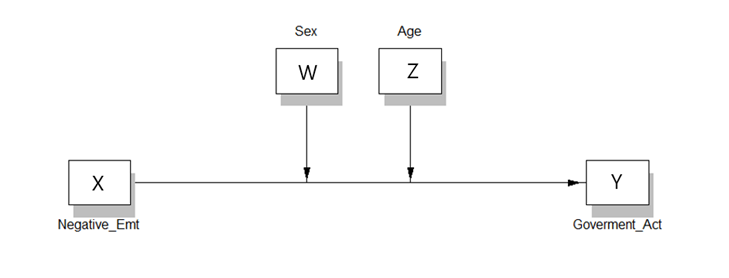

X: Negative_Emotions(기후변화에 대해 부정적인 감정을 갖고 있는 정도)  
Y: Government_Action(기후변화에 대한 정부의 조치를 지지하는 것)  
W: Sex(성별) (여성 - 0, 남성 - 1)  
Z: Age(나이)  


In [4]:
data_2 = pd.read_csv('/content/Drive/MyDrive/논문/model_2.csv', index_col=0)
data_2.head()

,govact,posemot,negemot,ideology,age,sex,partyid
1,3.6,3.67,4.67,6,61,0,2
2,5.0,2.00,2.33,2,55,0,1
3,6.6,2.33,3.67,1,85,1,1
4,1.0,5.00,5.00,1,59,0,1
5,4.0,2.33,1.67,4,22,1,1


In [5]:
data_2.describe()

,govact,posemot,negemot,ideology,age,sex,partyid
count,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000
mean,4.586994,3.132160,3.557988,4.083436,49.536196,0.488344,1.883436
std,1.360437,1.346543,1.528432,1.511758,16.330760,0.500171,0.867037
min,1.000000,1.000000,1.000000,1.000000,17.000000,0.000000,1.000000
25%,4.000000,2.000000,2.330000,3.000000,36.000000,0.000000,1.000000
50%,4.800000,3.000000,3.670000,4.000000,51.000000,0.000000,2.000000
75%,5.600000,4.000000,5.000000,5.000000,63.000000,1.000000,3.000000
max,7.000000,6.000000,6.000000,7.000000,87.000000,1.000000,3.000000


## Mean +- 1SD
* X: negemot - mean: 3.5580, sd: 1.5284
* W: sex - 0(female), 1(male) 
* Z: age - mean : 49.5362, sd : 16.3308  

## 수식
### * 𝑌=4.4748+0.1154𝑋−0.8449𝑊−0.0241𝑍+0.2208𝑋𝑊+0.0054𝑋𝑍 (crisp)
### * 𝑌=3.5682+0.3571𝑋-0.6532𝑊-0.0196𝑍+0.1761𝑋𝑊+0.0043𝑋𝑍  (fuzzy)

## 조건부효과  
b1 + b4W + b5Z

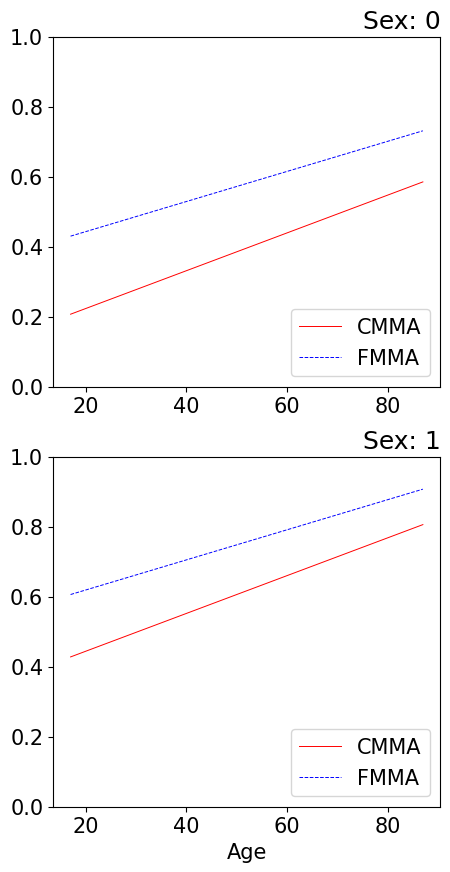

In [18]:
z_li = np.linspace(17, 87, 100)
w_li = np.array([0, 1])

plt.figure(figsize=(5, 10))

for w in w_li:      
  y_1 = 0.1154 + 0.2208*w + 0.0054*z_li # crisp
  y_2 = 0.3571 + 0.1761*w + 0.0043*z_li # fuzzy
  plt.subplot(2,1,w+1)
  plt.plot(z_li, y_1, color='r', linestyle = '-', linewidth=0.7)
  plt.plot(z_li, y_2, color='b', linestyle = '--', linewidth=0.7)
  plt.legend(['CMMA', 'FMMA'], loc='lower right')
  plt.yticks([0, 0.2,0.4,0.6,0.8,1.0])
  plt.title('Sex: '+ str(w), loc='right')
  if w == 1:
    plt.xlabel('Age')

plt.show()

----

# 2) model 3 (glbwarm data)

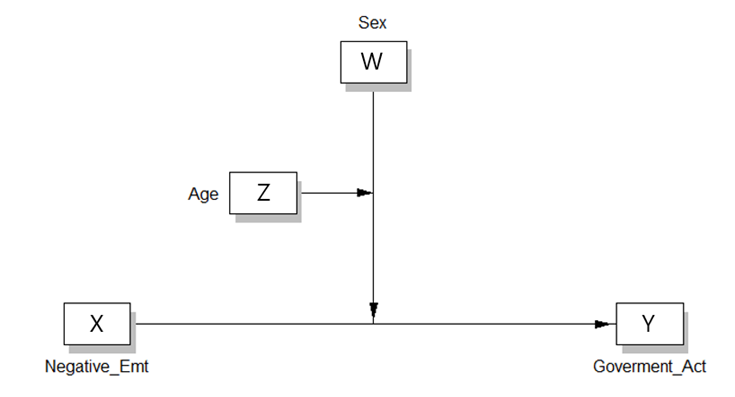

X: Negative_Emotions(기후변화에 대해 부정적인 감정을 갖고 있는 정도)  
Y: Government_Action(기후변화에 대한 정부의 조치를 지지하는 것)  
W: Sex(성별) (여성 - 0, 남성 - 1)  
Z: Age(나이)  


## Mean +- 1SD
* X: negemot - mean: 3.5580, sd: 1.5284
* W: sex - 0(female), 1(male) 
* Z: age - mean : 49.5362, sd : 16.3308  

## 수식
### * 𝑌=3.6733+0.3120𝑋+0.5985𝑊−0.0071𝑍−0.1413𝑋𝑊+0.0012𝑋𝑍−0.0287𝑊𝑍+0.0072𝑋𝑊𝑍 (crisp)
### * 𝑌=2.9476+0.5045𝑋+0.4595𝑊−0.0064𝑍-0.0928𝑋𝑊+0.0011𝑋𝑍-0.0223𝑊𝑍+0.0054𝑋𝑊𝑍 (fuzzy)

## 조건부효과  
b1 + b4W + b5Z + b7WZ

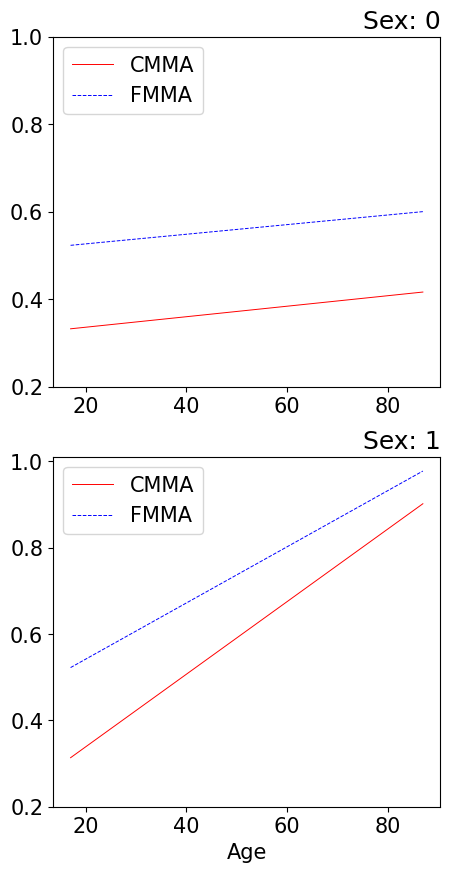

In [19]:
z_li = np.linspace(17, 87, 100)
w_li = np.array([0, 1])

plt.figure(figsize=(5, 10))

for w in w_li:      
  y_1 = 0.3120 - 0.1413*w + 0.0012*z_li + 0.0072*w*z_li # crisp
  y_2 = 0.5045 - 0.0928*w + 0.0011*z_li + 0.0054*w*z_li # fuzzy
  plt.subplot(2,1,w+1)
  plt.plot(z_li, y_1, color='r', linestyle = '-', linewidth=0.7)
  plt.plot(z_li, y_2, color='b', linestyle = '--', linewidth=0.7)
  plt.legend(['CMMA', 'FMMA'], loc='upper left')
  plt.yticks([0.2,0.4,0.6,0.8,1.0])
  plt.title('Sex: '+ str(w), loc='right')
  if w == 1:
    plt.xlabel('Age')

plt.show()

----

# 3) model 16 (bike data)

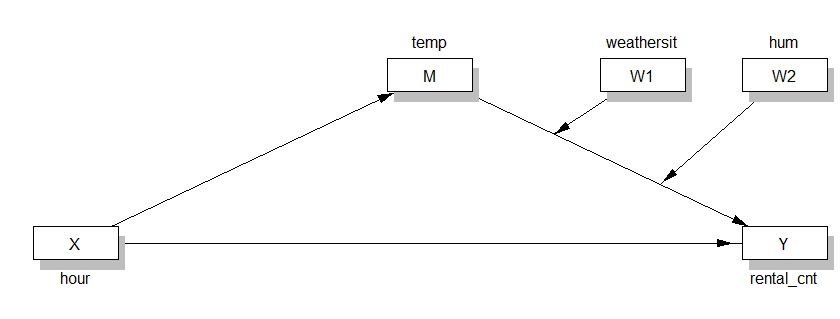

X: hour(시간)  
M: temp(기온)  
Y: rental_cnt(자전거 렌탈횟수)  
W: weathersit  
Z: hum(습도)

---- 
weathersit
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  


In [ ]:
data_16 = pd.read_csv('/content/Drive/MyDrive/논문/model_16_bike.csv')
data_16.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,cnt
0,2011-01-01,1,1,0.22,0.2727,0.80,0.0,8,0.040000
1,2011-01-01,2,1,0.22,0.2727,0.80,0.0,5,0.031795
2,2011-01-01,4,1,0.24,0.2879,0.75,0.0,0,0.000000
3,2011-01-01,6,1,0.22,0.2727,0.80,0.0,2,0.001026
4,2011-01-01,7,1,0.20,0.2576,0.86,0.0,1,0.002051


In [ ]:
data_16.describe()

,hr,weathersit,temp,atemp,hum,windspeed,casual,cnt
count,10948.000000,10948.000000,10948.000000,10948.000000,10948.000000,10948.000000,10948.000000,10948.000000
mean,11.584034,1.427749,0.498230,0.477251,0.627739,0.189384,35.937980,0.195132
std,6.915254,0.640282,0.192784,0.172065,0.193287,0.121738,49.174875,0.187222
min,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,0.040000
50%,12.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,0.147692
75%,18.000000,2.000000,0.660000,0.621200,0.790000,0.253700,49.000000,0.288205
max,23.000000,4.000000,1.000000,0.984800,1.000000,0.850700,367.000000,1.000000


## Mean +- 1SD
* M: temp - mean: 0.4982, sd: 0.1928
* W: weathersit - 1,2,3,4
* Z: hum - mean : 0.6277, sd : 0.1933  

## 수식
### * 𝑀=0.4520+0.0040𝑋 (crisp)
### * 𝑌=−0.0745+0.0075𝑋+0.6419𝑀−0.0311𝑊+0.1165𝑍+0.0528𝑀𝑊−0.6545𝑀𝑍 (crisp)
### * 𝑀=0.4520+0.0040𝑋 (fuzzy)
### * 𝑌=−0.0669+0.0075𝑋+0.6202𝑀−0.0220𝑊+0.0891𝑍+0.0411𝑀𝑊−0.6026𝑀𝑍 (fuzzy)

## 조건부 간접효과
ab1 + ab4W + ab5Z

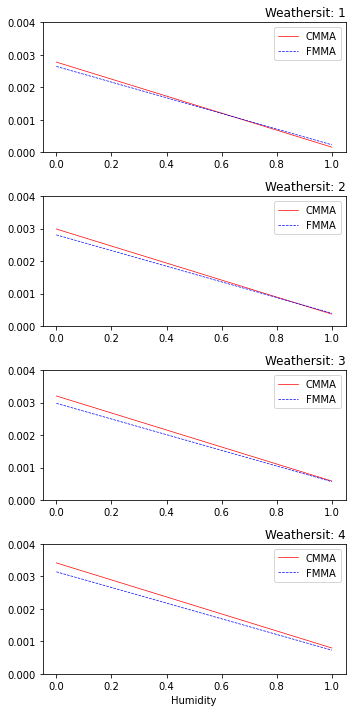

In [ ]:
z_li = np.linspace(0,1,50)
w_li = np.array([1,2,3,4])

plt.figure(figsize=(5, 10))

for w in w_li:      # female
  y_1 = 0.0040*0.6419 + 0.0040*0.0528*w + 0.0040*(-0.6545)*z_li # crisp
  y_2 = 0.0040*0.6202 + 0.0040*0.0411*w + 0.0040*(-0.6026)*z_li # fuzzy
  plt.subplot(4,1,w)  
  plt.plot(z_li, y_1, color='r', linestyle = '-',linewidth=0.7)
  plt.plot(z_li, y_2, color='b', linestyle = '--',linewidth=0.7)
  plt.legend(['CMMA', 'FMMA'])
  plt.yticks([0, 0.001, 0.002, 0.003, 0.004])
  plt.title('Weathersit: ' + str(w), loc='right')
  if w == 4:
    plt.xlabel('Humidity')


plt.tight_layout()
plt.show()

----

# 4) model 11(Binladen data)

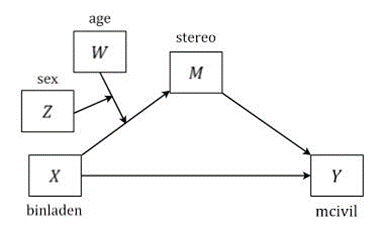

X : news_content(0: 빈라덴죽음 발표 전, 1: 빈라덴죽음 들었을 때)  
M : stereo(미국의 사는 무슬림에 대한 부정적인 고정관념에 대한 지지정도 평균)  
Y : mcivil(미국의 사는 무슬림의 자유제한 지지정도 평균)  
W : age(나이) ex) 7.5 -> 75살   
Z : sex(성별, 0: female, 1: male) 



In [ ]:
data_11 = pd.read_csv('/content/Drive/MyDrive/논문/model_11.csv')
data_11.head()

,news_content,rthreat,stereo,mcivil,age,ideo,sex
0,0,3.00,2.8,2.8,7.5,8,0
1,1,2.00,1.8,3.2,3.3,4,1
2,1,2.25,2.0,2.8,5.6,6,0
3,1,2.00,2.6,3.4,4.0,5,1
4,1,4.00,4.2,4.0,5.9,8,1


In [ ]:
data_11.describe()

,news_content,rthreat,stereo,mcivil,age,ideo,sex
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,0.409985,2.584720,2.918608,2.621180,4.845991,5.363086,0.521936
std,0.492203,1.054306,0.859723,1.032578,1.655515,2.207034,0.499897
min,0.000000,1.000000,1.000000,1.000000,1.800000,1.000000,0.000000
25%,0.000000,1.750000,2.400000,1.800000,3.700000,4.000000,0.000000
50%,0.000000,2.500000,3.000000,2.600000,4.800000,5.000000,1.000000
75%,1.000000,3.250000,3.400000,3.200000,5.900000,7.000000,1.000000
max,1.000000,5.000000,5.000000,5.000000,9.200000,9.000000,1.000000


## Mean +- 1SD
* W: age - mean: 4.8460, sd: 1.6555
* Z: sex - 0, 1

## 수식
### * 𝑀=2.2640+1.1823𝑋+0.1154𝑊+0.2934𝑍-0.2016𝑋𝑊-1.2697𝑋𝑍-0.0404𝑊𝑍+0.2303𝑋𝑊𝑍 (crisp)
### * 𝑌=0.9320-0.0518𝑋+0.5861𝑀 (crisp)

  
### * 𝑀=2.2933+1.1125𝑋+0.1096𝑊+0.2909𝑍-0.1887𝑋𝑊-1.2090𝑋𝑍-0.0416𝑊𝑍+0.2207𝑋𝑊𝑍 (fuzzy)
### * 𝑌=0.5225-0.0626𝑋+0.7397𝑀 (fuzzy)

## 조건부 간접효과
a1b + a4bW + a5bZ + a7bwz

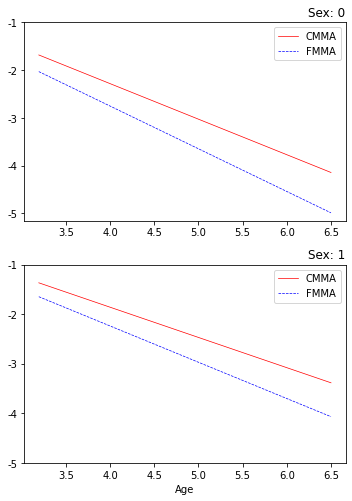

In [ ]:
w_li = np.array([0, 1])
z_li = np.array([3.1905, 4.8460, 6.5015])

plt.figure(figsize=(5, 10))
num=1

for w in w_li:      
  y_1 = 1.1823*0.5861 + (-0.2016)*0.5861*w + (-1.2697)*0.5861*z_li + 0.2303*0.5861*w*z_li # crisp
  y_2 = 1.1125*0.7397 + (-0.1887)*0.7397*w + (-1.2090)*0.7397*z_li + 0.2207*0.7397*w*z_li # fuzzy
  plt.subplot(3,1,num)  
  plt.plot(z_li, y_1, color='r', linestyle = '-', linewidth=0.7)
  plt.plot(z_li, y_2, color='b', linestyle = '--', linewidth=0.7)
  plt.legend(['CMMA', 'FMMA'])
  plt.title('Sex: ' + str(w), loc='right')
  plt.yticks([-5,-4,-3,-2,-1])
  if num == 2:
    plt.xlabel('Age')
  num+=1

plt.tight_layout()
plt.show()

----

# 5) model 11(solar data)

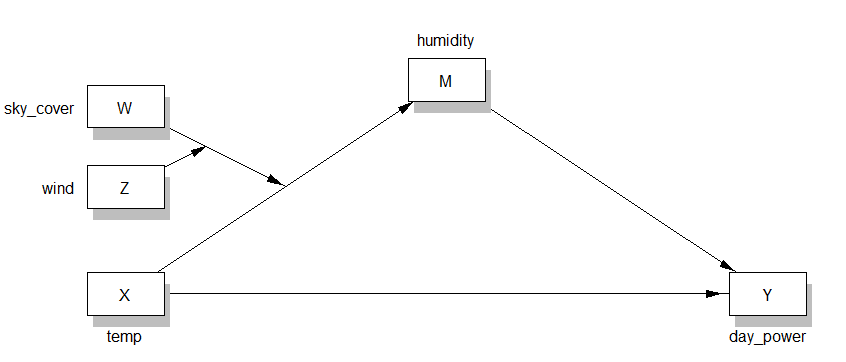

 X : temp(기온)  
M : humidity(습도)  
Y : day_power(태양광 발전량)  
W : sky_cover(운량)  
Z : wind(풍속)  



In [ ]:
data_18 = pd.read_csv('/content/Drive/MyDrive/논문/model_18.csv')
data_18.head()

,temp,wind,humidity,barometer,day_power,sky_cover
0,0.312052,0.234784,0.778769,0.638520,0.058824,2
1,0.369939,0.412924,0.725910,0.424439,0.058824,3
2,0.352761,0.572187,0.709644,0.296313,0.058824,5
3,0.348520,0.334605,0.751113,0.118489,0.029412,3
4,0.348466,0.313384,0.735478,0.160241,0.029412,6


In [ ]:
data_18.describe()

,temp,wind,humidity,barometer,day_power,sky_cover
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,0.493488,0.293508,0.621509,0.553194,0.337882,4.236486
std,0.186860,0.160468,0.159581,0.147282,0.241061,1.274057
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.347274,0.174399,0.513482,0.466961,0.117647,4.000000
50%,0.491712,0.270870,0.628314,0.563073,0.294118,4.000000
75%,0.645286,0.385687,0.742839,0.648581,0.529412,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


## Mean +- 1SD
* W: sky_cover - mean: 4.2365, sd: 1.2741
* Z: wind - mean : 0.2935, sd : 0.1605  

# 수식
## * 𝑀=0.9370-0.9212𝑋-0.0035𝑊-0.9191𝑍+0.0777𝑋𝑊+2.0611𝑋𝑍+0.1339𝑊𝑍-0.3276𝑋𝑊𝑍 (crisp)
## * 𝑌=0.6099+0.4950𝑋-0.8307𝑀 (crisp)

  
## * 𝑀=0.8503-0.8038*X+0.0116*W-0.7326*Z+0.0566*X*W+1.6342*X*Z+0.0974*W*Z-0.2280*X*W*Z (fuzzy)
## * 𝑌=0.5432+0.5348*X-0.7549*M (fuzzy)



## 조건부 간접효과
a1b + a4bW + a5bZ + a7bwz

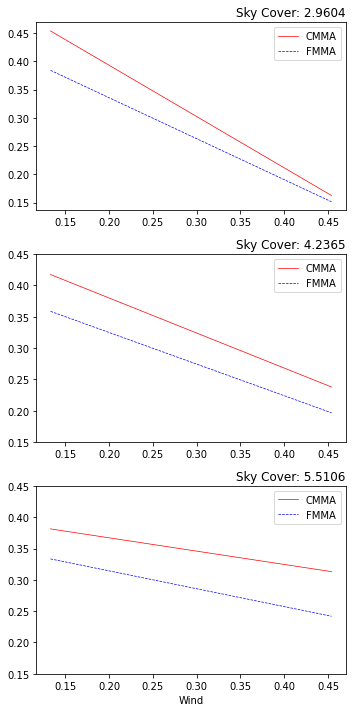

In [ ]:
w_li = np.array([2.9604, 4.2365, 5.5106])
z_li = np.array([0.1330, 0.2935, 0.4540])

plt.figure(figsize=(5, 10))
num=1

for w in w_li:      
  y_1 = (-0.9212)*(-0.8307) + 0.0777*(-0.8307)*w + 2.0611*(-0.8307)*z_li +(-0.3276)*(-0.8307)*w*z_li # crisp
  y_2 = (-0.8038)*(-0.7549) + 0.0566*(-0.7549)*w + 1.6342*(-0.7549)*z_li +(-0.2280)*(-0.7549)*w*z_li # fuzzy
  plt.subplot(3,1,num)  
  plt.plot(z_li, y_1, color='r', linestyle = '-', linewidth=0.7)
  plt.plot(z_li, y_2, color='b', linestyle = '--', linewidth=0.7)
  plt.legend(['CMMA', 'FMMA'])
  plt.title('Sky Cover: ' + str(w), loc='right')
  plt.yticks([0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45])
  if num == 3:
    plt.xlabel('Wind')
  num+=1

plt.tight_layout()
plt.show()

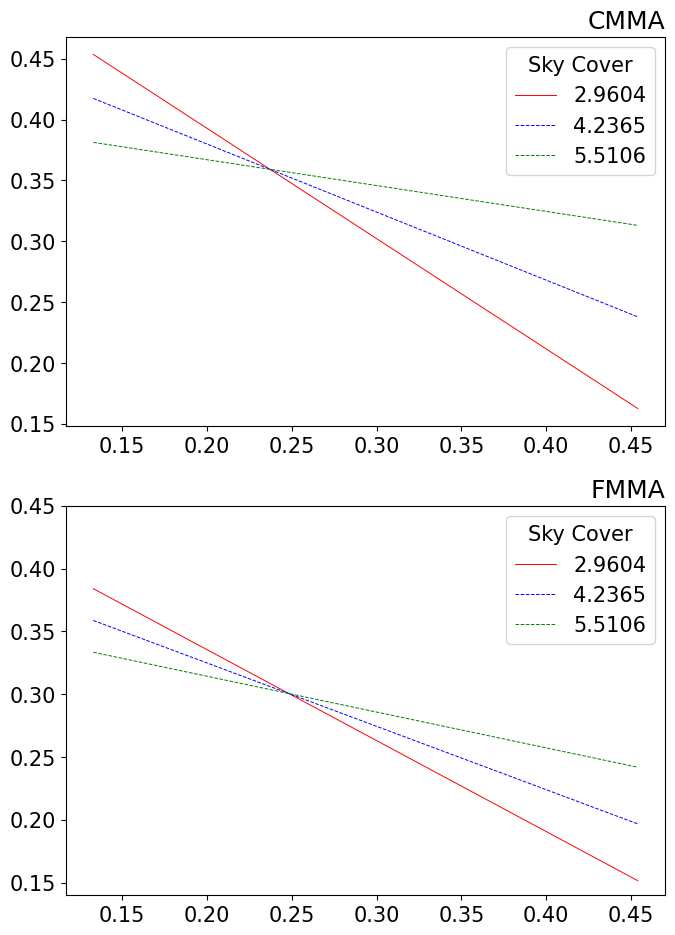

In [ ]:
w_li = np.array([2.9604, 4.2365, 5.5106])
z_li = np.array([0.1330, 0.2935, 0.4540])

plt.figure(figsize=(7, 14))

plt.subplot(3,1,1)
w = w_li[0]     
y_1 = (-0.9212)*(-0.8307) + 0.0777*(-0.8307)*w + 2.0611*(-0.8307)*z_li +(-0.3276)*(-0.8307)*w*z_li # crisp
plt.plot(z_li, y_1, color='r', linestyle = '-', linewidth=0.7)

w = w_li[1]     
y_1 = (-0.9212)*(-0.8307) + 0.0777*(-0.8307)*w + 2.0611*(-0.8307)*z_li +(-0.3276)*(-0.8307)*w*z_li
plt.plot(z_li, y_1, color='b', linestyle = '--', linewidth=0.7)

w = w_li[2]     
y_1 = (-0.9212)*(-0.8307) + 0.0777*(-0.8307)*w + 2.0611*(-0.8307)*z_li +(-0.3276)*(-0.8307)*w*z_li
plt.plot(z_li, y_1, color='g', linestyle = '--', linewidth=0.7)
plt.legend([w_li[0], w_li[1], w_li[2]], title='Sky Cover')
plt.title('CMMA', loc='right')
plt.yticks([0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45])

plt.subplot(3,1,2)
w = w_li[0]     
y_2 = (-0.8038)*(-0.7549) + 0.0566*(-0.7549)*w + 1.6342*(-0.7549)*z_li +(-0.2280)*(-0.7549)*w*z_li
plt.plot(z_li, y_2, color='r', linestyle = '-', linewidth=0.7)

w = w_li[1]     
y_2 = (-0.8038)*(-0.7549) + 0.0566*(-0.7549)*w + 1.6342*(-0.7549)*z_li +(-0.2280)*(-0.7549)*w*z_li
plt.plot(z_li, y_2, color='b', linestyle = '--', linewidth=0.7)

w = w_li[2]     
y_2 = (-0.8038)*(-0.7549) + 0.0566*(-0.7549)*w + 1.6342*(-0.7549)*z_li +(-0.2280)*(-0.7549)*w*z_li
plt.plot(z_li, y_2, color='g', linestyle = '--', linewidth=0.7)
plt.legend([w_li[0], w_li[1], w_li[2]], title='Sky Cover')
plt.title('FMMA', loc='right')
plt.yticks([0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45])


plt.tight_layout()
plt.show()